# Monte Carlo cross validation

In [1]:
import pandas as pd
data = pd.read_csv('data/data.csv',index_col=0)
data

,status,biomarker
obs,,
1,0,1.665731
2,0,-0.875837
3,0,-1.391374
4,0,-0.297352
5,1,0.189857
...,...,...
96,1,-1.442304
97,1,0.779178
98,0,0.133939


In [2]:
X = data[['biomarker']]
Y = data[['status']]
display(X.head())
Y

,biomarker
obs,
1,1.665731
2,-0.875837
3,-1.391374
4,-0.297352
5,0.189857


,status
obs,
1,0
2,0
3,0
4,0
5,1
...,...
96,1
97,1
98,0


In [3]:
!python3 -m pip install .

Processing /Users/nickgiangreco/GitHub/mccv
  Preparing metadata (setup.py) ... done
  Created wheel for mccv: filename=mccv-0.1a0-py3-none-any.whl size=9734 sha256=df3e09b4db5c3e5b6806dfdd0a7f5bc276e27b7d6b646e386e7611ddd524b8f5
  Stored in directory: /private/var/folders/00/hrw448cj27l47l_0f2lrz1rr0000gp/T/pip-ephem-wheel-cache-erjyl_5z/wheels/12/b7/b1/ebdb03c3d6a95394c04a56e79f1e1ebff0163df64595651a5c
Successfully built mccv
  Attempting uninstall: mccv
    Found existing installation: mccv 0.1a0
    Uninstalling mccv-0.1a0:
      Successfully uninstalled mccv-0.1a0


In [5]:
import mccv

In [7]:
mccv_obj = mccv.mccv(num_bootstraps=200)

In [8]:
mccv_obj.__dict__

{'X': (None,),
 'Y': (None,),
 'all_models': {'Logistic Regression': LogisticRegression(C=1000000, random_state=0, solver='liblinear', tol=0.001),
  'Random Forest': RandomForestClassifier(max_depth=1, max_features='log2', min_samples_leaf=2,
                         n_jobs=2, oob_score=True, random_state=0),
  'Support Vector Machine': SVC(C=1, kernel='linear', probability=True, random_state=0),
  'Gradient Boosting Classifier': GradientBoostingClassifier(max_depth=1, max_features='log2', min_samples_leaf=2,
                             random_state=0)},
 'model_names': ['Logistic Regression'],
 'num_bootstraps': 200,
 'cv_split': 10,
 'test_size': 0.15,
 'n_jobs': 2,
 'metrics': ['roc_auc'],
 'return_train_score': True,
 'return_estimator': True,
 'seed': 0,
 'mccv_data': None,
 'mccv_permuted_data': None}

In [21]:
nboot = mccv_obj.num_bootstraps

In [9]:
mccv_obj.model_names = ['Logistic Regression','Random Forest','Support Vector Machine','Gradient Boosting Classifier']

In [10]:
mccv_obj.set_X(X)
mccv_obj.set_Y(Y)

In [11]:
mccv_obj.run_mccv()

In [12]:
mccv_obj.mccv_data.keys()

dict_keys(['Model Learning', 'Feature Importance', 'Patient Predictions', 'Performance'])

In [13]:
mccv_obj.run_permuted_mccv()

Text(0.5, 1.0, 'Model performance across 200 bootstraps')

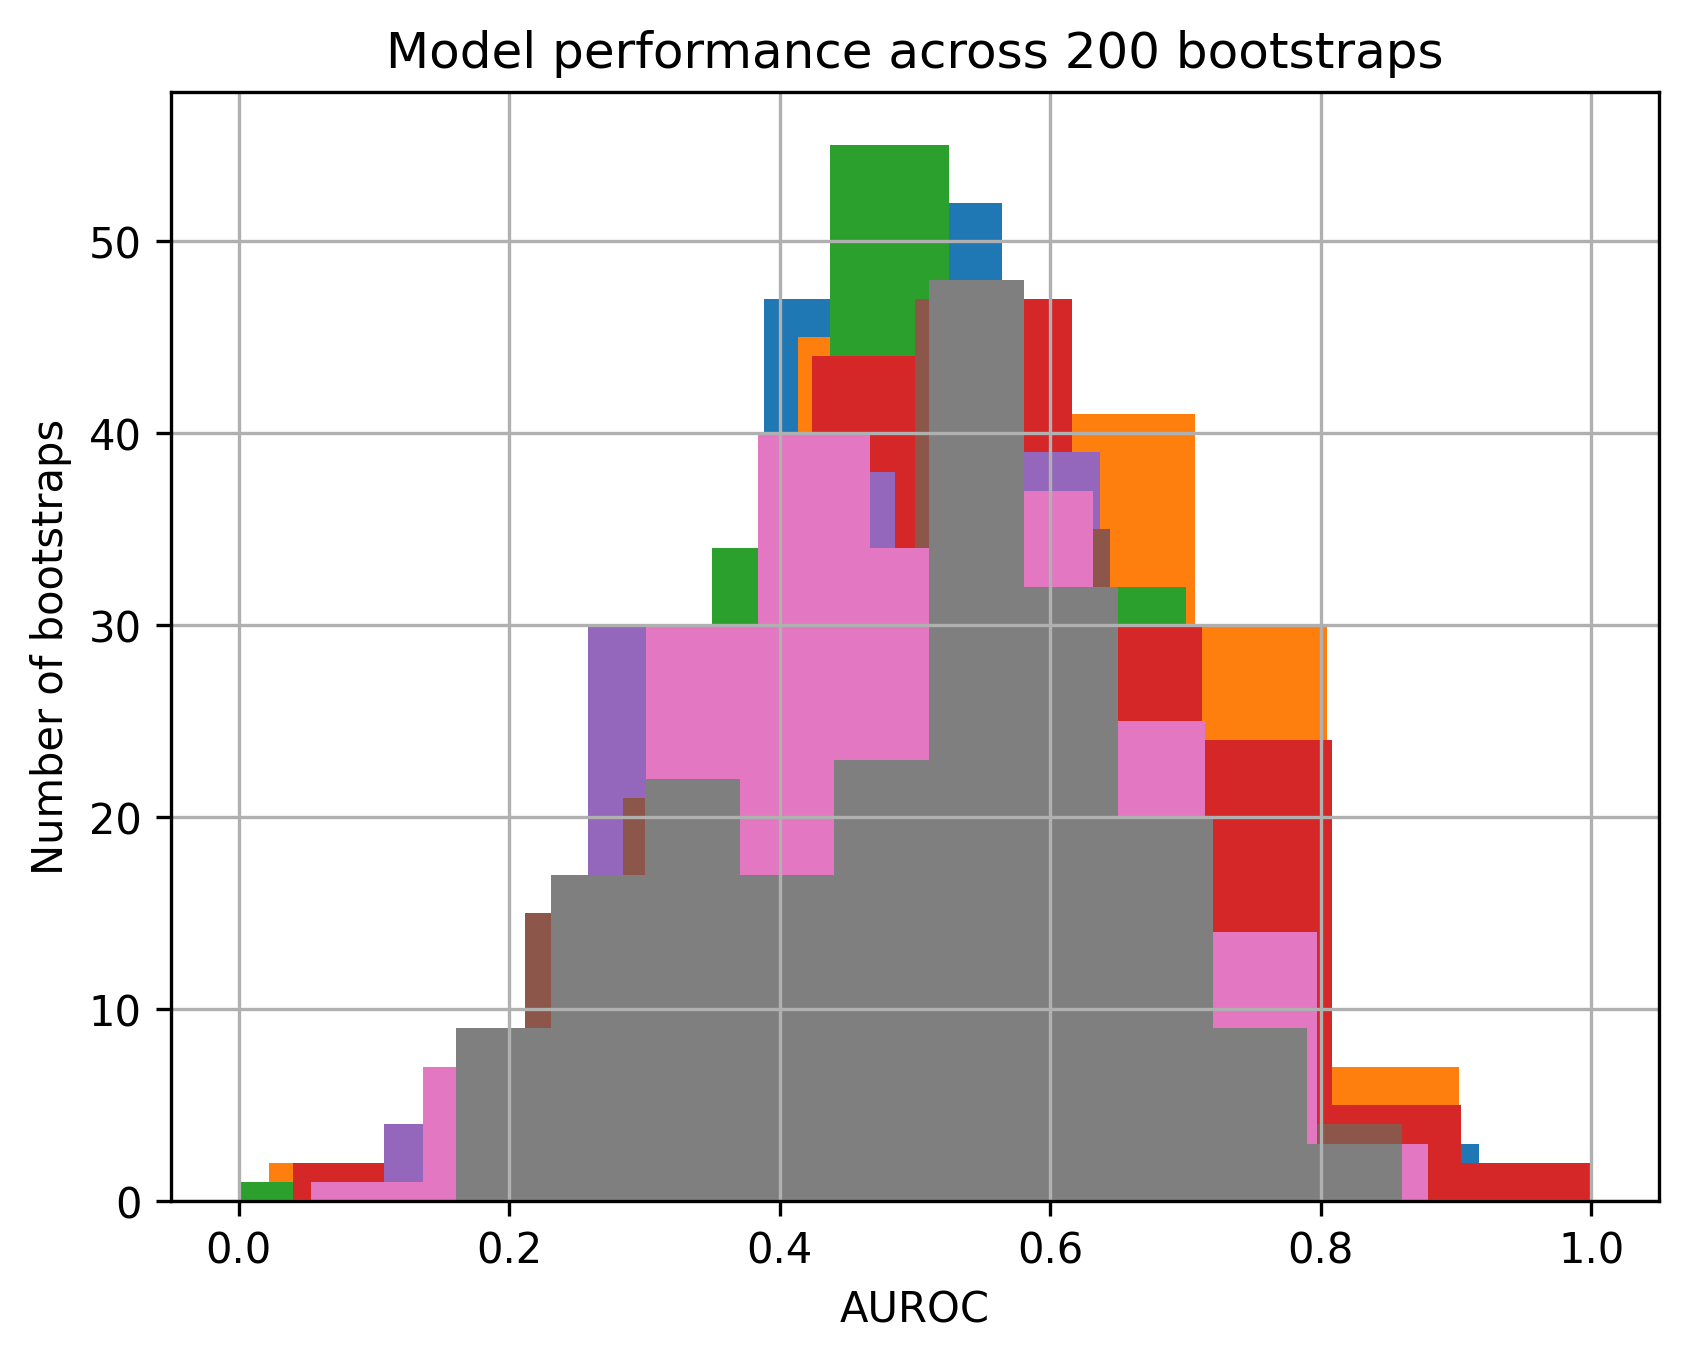

In [22]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(dpi=300)
mccv_obj.mccv_data['Model Learning'].groupby(['model'])['validation_roc_auc'].hist(ax=ax)
mccv_obj.mccv_permuted_data['Model Learning'].groupby(['model'])['validation_roc_auc'].hist(ax=ax)
ax.set_xlabel('AUROC')
ax.set_ylabel('Number of bootstraps')
ax.set_title('Model performance across '+str(nboot)+' bootstraps')

Text(0.5, 1.0, 'Biomarker permuted importance across 200 bootstraps')

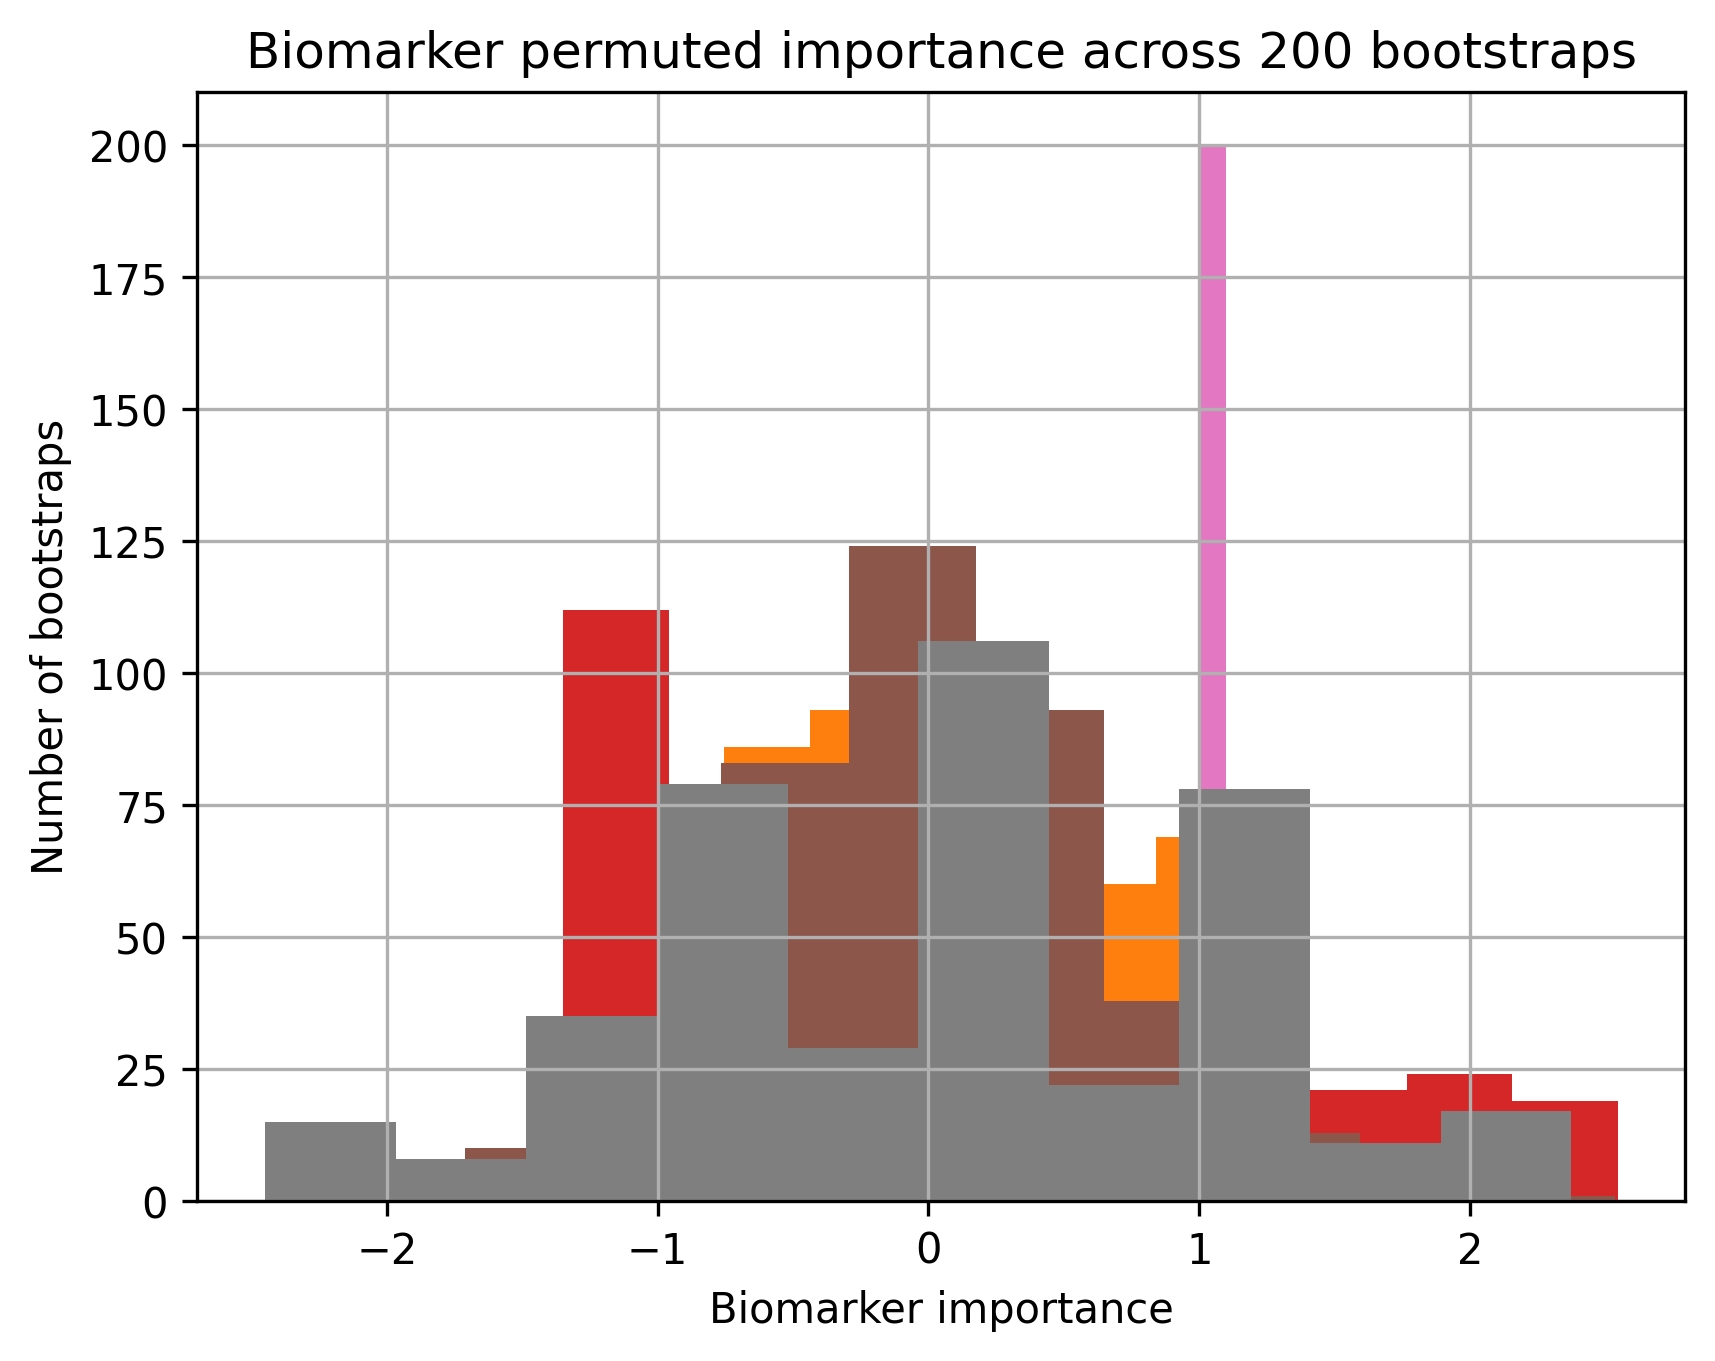

In [23]:
fig,ax = plt.subplots(dpi=300)
mccv_obj.mccv_data['Feature Importance'].groupby(['model'])['importance'].hist(ax=ax)
mccv_obj.mccv_permuted_data['Feature Importance'].groupby(['model'])['importance'].hist(ax=ax)

ax.set_xlabel('Biomarker importance')
ax.set_ylabel('Number of bootstraps')
ax.set_title('Biomarker permuted importance across '+str(nboot)+' bootstraps')

In [16]:
[x for x in mccv_obj.mccv_permuted_data.keys()]

['Model Learning', 'Feature Importance', 'Patient Predictions', 'Performance']

In [17]:
[type(mccv_obj.mccv_permuted_data[x]) for x in mccv_obj.mccv_permuted_data.keys()]

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame]

In [18]:
(mccv_obj.
 mccv_permuted_data['Performance'].
 groupby('model')['value'].describe())

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Gradient Boosting Classifier,50.0,0.462029,0.012163,0.428179,0.453828,0.462128,0.467949,0.487282
Logistic Regression,50.0,0.447370,0.011465,0.417786,0.439952,0.447782,0.454039,0.476226
Random Forest,50.0,0.459896,0.010858,0.436459,0.453826,0.460344,0.466427,0.484956
Support Vector Machine,50.0,0.484232,0.010137,0.460221,0.479323,0.484049,0.491455,0.506692


In [19]:
(mccv_obj.
 mccv_data['Performance'].
 groupby('model')['value'].describe())

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Gradient Boosting Classifier,50.0,0.468340,0.009513,0.446007,0.462941,0.469469,0.473644,0.488844
Logistic Regression,50.0,0.474480,0.009706,0.454925,0.467839,0.473629,0.481453,0.494880
Random Forest,50.0,0.455389,0.008920,0.439065,0.447743,0.455516,0.459923,0.475890
Support Vector Machine,50.0,0.416884,0.009678,0.393517,0.409232,0.418546,0.424701,0.433593
